## Tutoriel : interagir avec le système de stockage S3 du SSP Cloud (MinIO)

In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 82.0 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 73.2 MB/s eta 0:00:00


In [2]:
import os

import pandas as pd
import s3fs
import zipfile

### Récupérer les données d'un challenge

In [3]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

In [ ]:
# Loading Kaggle Dataset

In [36]:
fs.ls("virgile/diffusion/")# virgile/diffusion/

['virgile/diffusion/.keep', 'virgile/diffusion/archive.zip']

In [37]:
PATH_IN = 'virgile/diffusion/archive.zip'
fs.download(PATH_IN, 'data/archive.zip')

[None]

In [ ]:
# Décompresser les données
with zipfile.ZipFile("data/archive.zip","r") as zip_file:
    zip_file.extractall("data/")

In [ ]:
!pip install scikit-learn

In [41]:
local_path = 'data/car_data/car_data'

import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
# importing pytorch libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
# importing image required libraries
import time
import os
import PIL.Image as Image
from IPython.display import display
# importing sklearn libraries for evaluation
from sklearn.metrics import confusion_matrix, classification_report
# to check the availability of GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
print(torch.cuda.get_device_name(device))

cuda
Tesla T4


In [42]:
# creating a dictionary of the classes and counting the number of images in each class by iterating through the folders
car_count_dict = {}
for folder_name in os.listdir(os.path.join(local_path, 'train')):
    count = len(os.listdir(os.path.join(local_path, 'train', folder_name)))
    car_count_dict[folder_name] = count

for folder_name in os.listdir(os.path.join(local_path, 'test')):
    count = len(os.listdir(os.path.join(local_path, 'test', folder_name)))
    car_count_dict[folder_name] += count



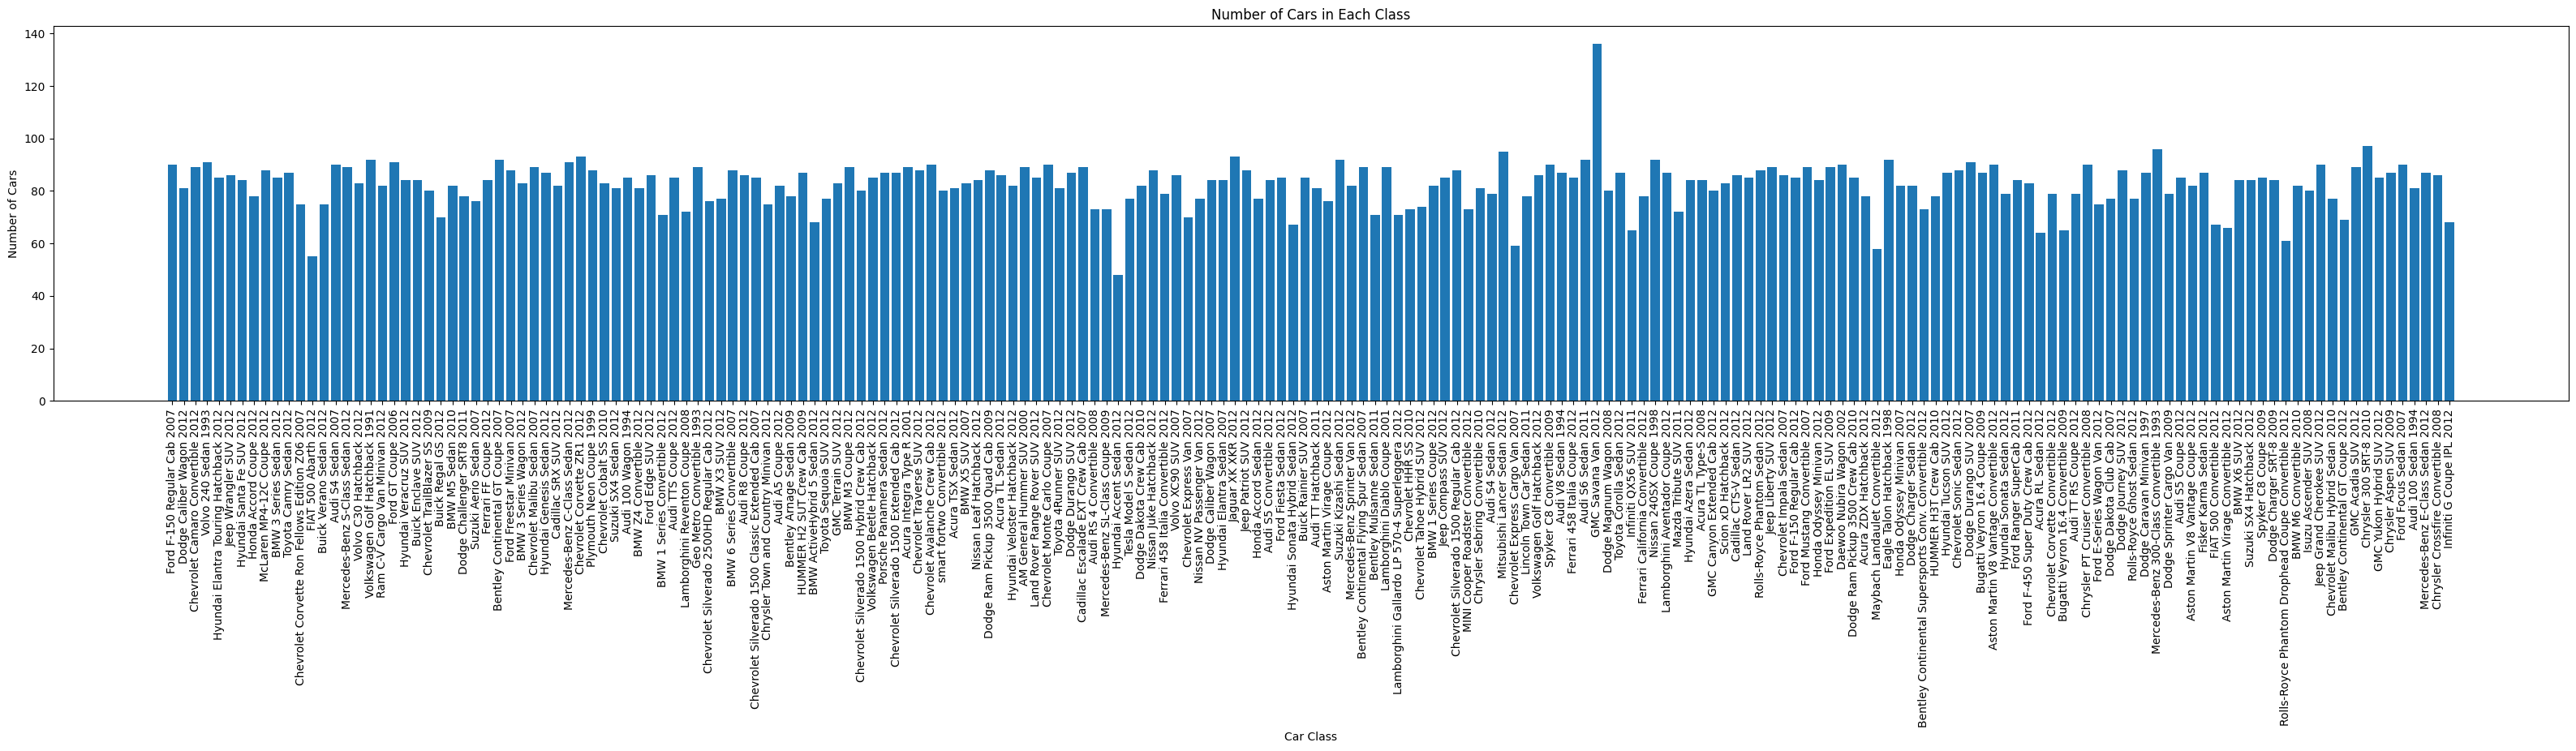

In [43]:
plt.figure(figsize=(40, 6))
    # Create a bar chart
plt.bar(car_count_dict.keys(), car_count_dict.values())

# Add labels and title
plt.xlabel('Car Class')
plt.ylabel('Number of Cars')
plt.title('Number of Cars in Each Class')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Display the histogram
plt.show()

In [44]:
# Data augmentation

In [62]:
dataset_dir = local_path
# defining the transformation for the dataset
train_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.RandomHorizontalFlip(),
                                transforms.RandomRotation(15),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
test_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

test_time_tfms = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.RandomRotation(90),
                                transforms.RandomHorizontalFlip(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# defining the dataset from the image folder 
# Here we use the folder names themselves as the class names
train_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_dir, 'train'), transform = train_tfms)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle=True, num_workers = 2)

test_dataset = torchvision.datasets.ImageFolder(root=os.path.join(dataset_dir, 'test'), transform = test_tfms)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle=False, num_workers = 2)

In [63]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
# getting the number of classes in the dataset
no_classes = len(train_dataset.classes)
# showing the architecture of the model
model.parameters

/opt/mamba/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/mamba/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


<bound method Module.parameters of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)


In [64]:
# replace the last fc layer with an untrained one based on the number of classes we have in our dataset (requires grad by default)
model.fc = nn.Linear(num_ftrs, no_classes)
model = model.to(device)

# defining the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

"""
Here we will use learning rate schedular to change the learning rate while training our model. We are tracking the training accuracy
and measuring whether it increases by atleast 0.9 per epoch and if it hasn't increased by 0.9 reduce the learning by 0.1x.
However in this model it did not benefit me.
"""
lrscheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', patience=3, threshold = 0.9)

In [65]:
!pip install tqdm

In [66]:
# Evaluation on the test set

In [67]:
import torch
from tqdm import tqdm

def eval_model(model, test_loader, device, test_time_tsfm=None, num_augmentations=1):
    correct = 0.0
    total = 0.0
    with torch.no_grad():
        # Iterate over the test data and generate predictions.
        for i, data in enumerate(test_loader, 0):
            # Get inputs
            images, labels = data
            # Transfer to GPU
            images = images.to(device)
            labels = labels.to(device)
            # If test time augmentation is provided, apply transformations
            if test_time_tsfm is not None:
                augmented_images = []
                for img in images:
                    augmented_images.extend(img)
                    # Apply the transformation num_augmentations times
                    augmented_imgs = [test_time_tsfm(img) for _ in range(num_augmentations)]
                    # Stack the augmented images into a single tensor and add to the list
                    augmented_images.extend(augmented_imgs)
                # Convert the list of augmented images to a single tensor
                images = torch.stack(augmented_images)

            # Forward pass
            outputs = model(images)
            # Get predictions from the maximum value 
            _, predicted = torch.max(outputs.data, 1)
            # Total number of labels in the test data set
            total += labels.size(0) * num_augmentations
            # Total correct predictions
            correct += (predicted == labels.repeat(num_augmentations)).sum().item()
    # Calculate the accuracy
    test_acc = 100.0 * correct / total
    print('Accuracy of the network on the test images: %d %%' % (
        test_acc))
    return test_acc

In [68]:
# Training the model

In [69]:
from tqdm import tqdm

def train_model(model, train_loader, test_loader, criterion, optimizer, scheduler, device, n_epochs=5):
    losses = []
    accuracies = []
    test_accuracies = []
    model.train()

    for epoch in range(n_epochs):
        since = time.time()
        running_loss = 0.0
        running_correct = 0.0

        with tqdm(train_loader, unit="batch", desc=f"Epoch {epoch+1}") as tepoch:
            for i, data in enumerate(tepoch):
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                running_correct += (labels == predicted).sum().item()

                tepoch.set_postfix(loss=loss.item(), accuracy=(labels == predicted).sum().item() / labels.size(0))

        epoch_duration = time.time() - since
        epoch_loss = running_loss / len(train_loader)
        epoch_acc = 100 / 32 * running_correct / len(train_loader)
        print(f"Epoch {epoch+1}, duration: {epoch_duration:.0f}s, loss: {epoch_loss:.4f}, acc: {epoch_acc:.4f}")

        losses.append(epoch_loss)
        accuracies.append(epoch_acc)

        model.eval()
        test_acc = eval_model(model, test_loader, device)
        test_accuracies.append(test_acc)
        model.train()

        scheduler.step(test_acc)
        since = time.time()

    print('Finished Training')
    return model, losses, accuracies, test_accuracies

In [70]:
# Start the training

n_epochs = 10
# train the model
model, training_losses, training_accs, test_accs = train_model(model, train_loader, 
                            test_loader, criterion, optimizer, lrscheduler, device, n_epochs=n_epochs)
# Save the model
torch.save(model.state_dict(), 'model.pth')

Epoch 1: 100%|██████████| 255/255 [01:22<00:00,  3.10batch/s, accuracy=0.312, loss=3]    

Epoch 1, duration: 82s, loss: 4.3588, acc: 11.1152


Accuracy of the network on the test images: 28 %


Epoch 2: 100%|██████████| 255/255 [01:21<00:00,  3.14batch/s, accuracy=0.562, loss=1.62]

Epoch 2, duration: 81s, loss: 2.0323, acc: 52.0098


Accuracy of the network on the test images: 57 %


Epoch 3: 100%|██████████| 255/255 [01:20<00:00,  3.16batch/s, accuracy=0.625, loss=1.24] 

Epoch 3, duration: 81s, loss: 1.0480, acc: 75.2696


Accuracy of the network on the test images: 67 %


Epoch 4: 100%|██████████| 255/255 [01:20<00:00,  3.16batch/s, accuracy=0.812, loss=0.786]

Epoch 4, duration: 81s, loss: 0.6381, acc: 84.7304


Accuracy of the network on the test images: 77 %


Epoch 5: 100%|██████████| 255/255 [01:20<00:00,  3.15batch/s, accuracy=1, loss=0.357]    

Epoch 5, duration: 81s, loss: 0.4062, acc: 90.4167


Accuracy of the network on the test images: 76 %


Epoch 6: 100%|██████████| 255/255 [01:21<00:00,  3.14batch/s, accuracy=0.938, loss=0.391]

Epoch 6, duration: 81s, loss: 0.2826, acc: 93.5417


Accuracy of the network on the test images: 82 %


Epoch 7: 100%|██████████| 255/255 [01:21<00:00,  3.14batch/s, accuracy=0.938, loss=0.183] 

Epoch 7, duration: 81s, loss: 0.1415, acc: 97.7328


Accuracy of the network on the test images: 88 %


Epoch 8: 100%|██████████| 255/255 [01:21<00:00,  3.15batch/s, accuracy=1, loss=0.156]     

Epoch 8, duration: 81s, loss: 0.1080, acc: 98.3701


Accuracy of the network on the test images: 88 %


Epoch 9: 100%|██████████| 255/255 [01:22<00:00,  3.10batch/s, accuracy=1, loss=0.111]     

Epoch 9, duration: 82s, loss: 0.0949, acc: 98.5907


Accuracy of the network on the test images: 89 %


Epoch 10: 100%|██████████| 255/255 [01:20<00:00,  3.16batch/s, accuracy=1, loss=0.0886]    

Epoch 10, duration: 81s, loss: 0.0882, acc: 98.6275


Accuracy of the network on the test images: 89 %
Finished Training


In [76]:
# Map class indexes to their name

# tieing the class indices to their names
def find_classes(dir):
    classes = os.listdir(dir)
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx
classes, c_to_idx = find_classes(os.path.join(dataset_dir, 'train'))

In [77]:
# Model performance testing

""" we can load the saved model from training if we only want to test it without training it again
"""
# model = models.resnet34(pretrained=True)
# model.load_state_dict(torch.load('model.pth'))
# model.eval()

# switch the model to evaluation mode to make dropout and batch norm work in eval mode
model.eval()

""" 
transforms for the input image (this is not the test loader) This is just for a single image to be the same size and
normalized as the test loader 
"""
loader = transforms.Compose([transforms.Resize((400, 400)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

random_image_name = 'Aston Martin V8 Vantage Convertible 2012/00239.jpg'
image = Image.open(os.path.join(dataset_dir, 'test', random_image_name))
# display the image to be predicted 
image = loader(image).float()
image = torch.autograd.Variable(image, requires_grad=True)
# add a dimension to the image to make it a batch of 1 image to feed it to the model for prediction
image = image.unsqueeze(0)
image = image.cuda()
output = model(image)
# get the class indices from the model 
# conf represents the highest probability or confidence score among all the predicted classes for the given input image.
conf, predicted = torch.max(output.data, 1)

In [80]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 4.1 MB/s eta 0:00:00ta 0:00:01


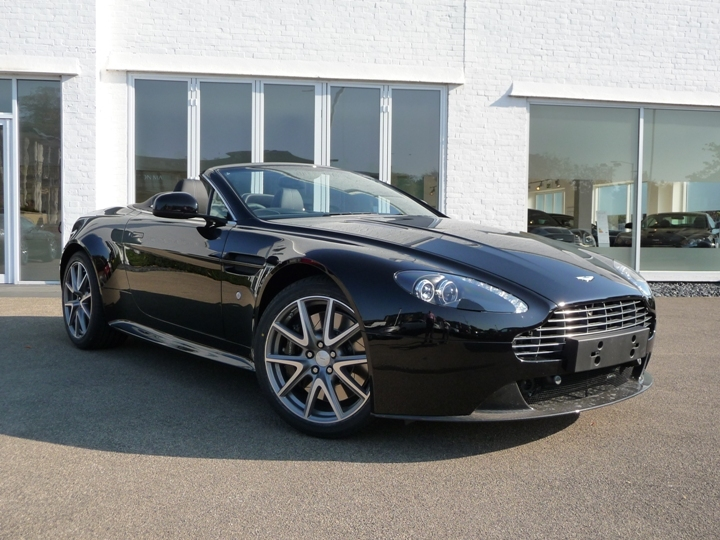

Aston Martin V8 Vantage Convertible 2012 confidence:  13.532464027404785


In [78]:
display(Image.open(os.path.join(dataset_dir, 'test', random_image_name)))
print(classes[predicted.item()], "confidence: ", conf.item())

In [75]:
# Create empty lists to store the true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate over the test_loader and generate predictions
with torch.no_grad():
    for images, labels in test_loader:
        # Transfer the images and labels to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        
        # Get the predicted labels from the maximum value
        _, predicted = torch.max(outputs.data, 1)
        
        # Append the true labels and predicted labels to the lists
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Generate the classification report
cr = classification_report(true_labels, predicted_labels)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)


Confusion Matrix:
[[43  0  0 ...  0  0  0]
 [ 0 43  0 ...  0  0  0]
 [ 0  0 29 ...  0  0  0]
 ...
 [ 0  0  0 ... 37  0  0]
 [ 0  0  0 ...  0 43  0]
 [ 0  0  0 ...  0  0 38]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.93        44
           1       0.86      0.98      0.91        44
           2       0.62      0.91      0.73        32
           3       0.81      0.88      0.84        43
           4       1.00      0.98      0.99        42
           5       1.00      0.80      0.89        40
           6       0.89      0.82      0.85        39
           7       0.76      0.76      0.76        45
           8       0.84      0.76      0.79        41
           9       0.84      0.79      0.81        33
          10       0.80      0.87      0.84        38
          11       0.66      0.72      0.69        40
          12       0.72      0.79      0.75        42
          13       0.73      0.85      0.79  